# Lesson: Natural Language Processing - EXPLORATION

<a href = "https://www.canva.com/design/DAFmeYEK1zQ/Fqr6k9NfwToipJqyFmeXXg/view?utm_content=DAFmeYEK1zQ&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink">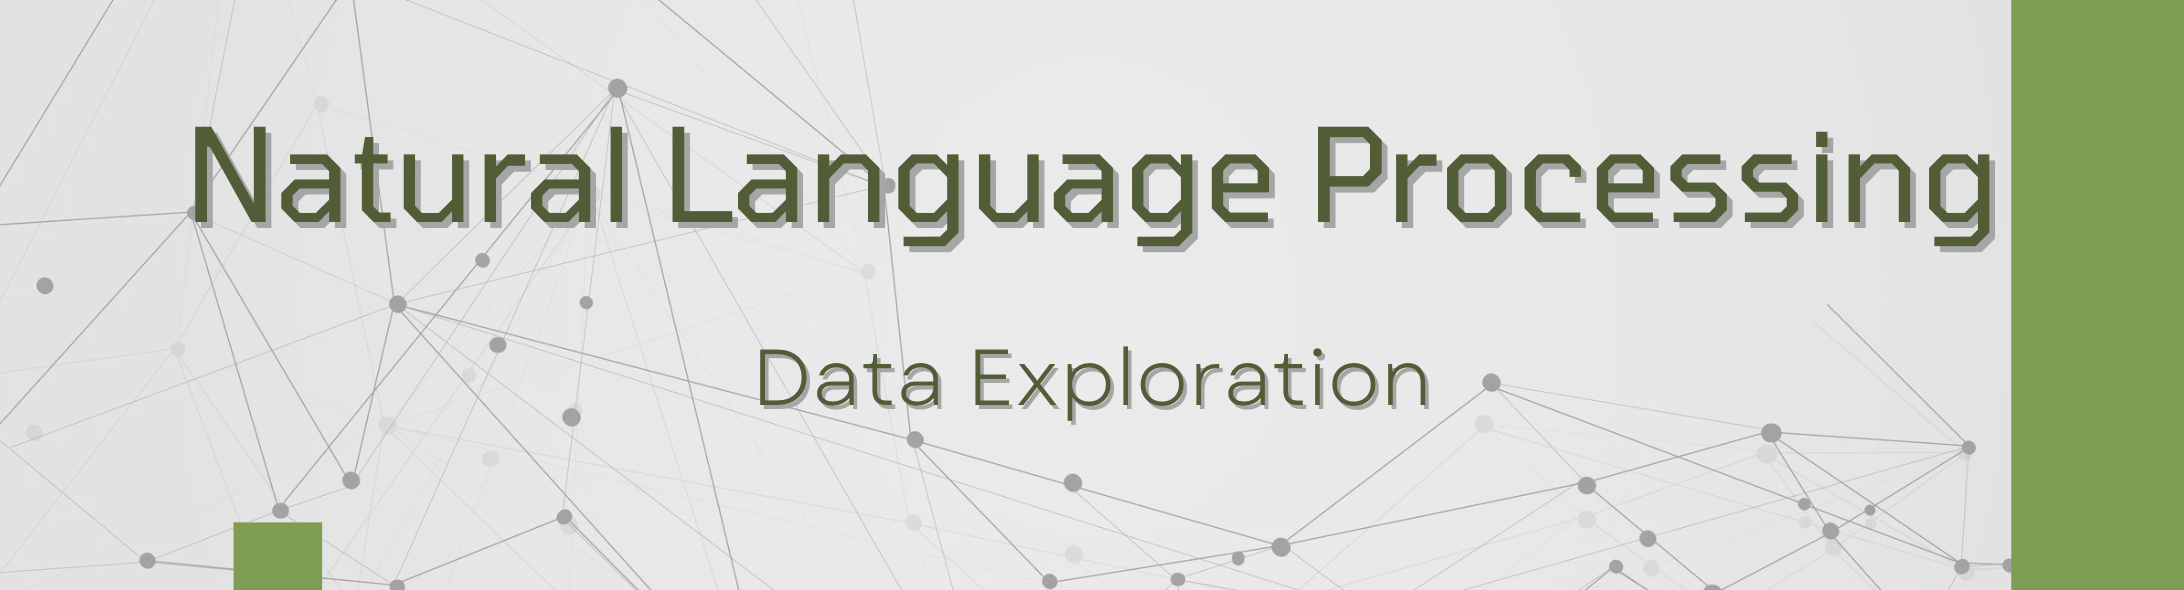
</a>

<hr style="border:2px solid gray">

# NLP EDA

Basically, exploration and modeling boil down to a single question:

How do we quantify our data/text

In this lesson, we'll explore answers to this question that will aid in visualization.

- word frequency (by label)
- ngrams
- word cloud
- sentiment analysis
- other common features

## Setup

Data is spam/ham text messages.

<a href = "https://pypi.org/project/wordcloud/">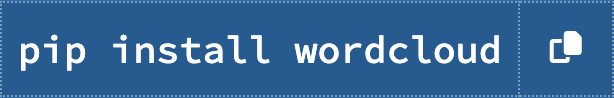</a>

In [ ]:
#Imports
import re

import unicodedata
import nltk
from wordcloud import WordCloud

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#from env import get_connection_url

In [ ]:
#Get SQL database url
url = get_connection_url('spam_db')

In [ ]:
#Define SQL query
query = '''
        SELECT *
        FROM spam
        '''

In [ ]:
#Read SQL
df = pd.read_sql()


In [ ]:
#Value counts of labels


### If we look at this in the context of a classification problem,
we may ask:
 - What leads to a spam text?
 - What leads to a ham text?
 

In [ ]:
# recall how the string method join operates -- glues together 
# all instances inside of a iterable using whatever is specified
# ahead of the method call:
# english: glue these words together with a empty space



In [ ]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', '4', 'ltgt']

def clean(text):
    '''
    A simple function to cleanup text data.
    
    Args:
        text (str): The text to be cleaned.
        
    Returns:
        list: A list of lemmatized words after cleaning.
    '''
    
    # basic_clean() function from last lesson:
    # Normalize text by removing diacritics, encoding to ASCII, decoding to UTF-8, and converting to lowercase
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    
    # Remove punctuation, split text into words
    words = re.sub(r'[^\w\s]', '', text).split()
    
    
    # lemmatize() function from last lesson:
    # Initialize WordNet lemmatizer
    wnl = nltk.stem.WordNetLemmatizer()
    
    # Combine standard English stopwords with additional stopwords
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    
    # Lemmatize words and remove stopwords
    cleaned_words = [wnl.lemmatize(word) for word in words if word not in stopwords]
    
    return cleaned_words

In [ ]:
# we can do that process with a join on a Series and not just a list
# we will do that for ham words, spam words, and all words
# we will pass our basic cleaning on top of that

ham_words = 
spam_words =
all_words = 

In [ ]:
len(all_words), len(spam_words), len(ham_words)

In [ ]:
# let's get some sights on word frequency by taking our words back apart
# we will split each set of words by the spaces,
# turn that into a list, cast that list as a Series,
# and then take the value counts of that Series
# We will do this for each type of word present

ham_freq = 
spam_freq =
all_freq = 

## Exploration

Represent text as word frequencies.
- concat all frequencies together into a dataframe

In [ ]:
# lets combine all 3 dfs horizontally
# fill any missing values with zero
# convert the resulting df to contain only integer values:

word_counts = 

# rename the col names
word_counts.columns = 

word_counts.head()

In [ ]:
word_counts.sample(5).head()

- What are the most frequently occuring words?
- Are there any words that uniquely identify a spam or ham message? 
    - (*I.e. words present in one type of message but not the other?*)

In [ ]:
# sort by 'all'



In [ ]:
# sort by 'ham' and 'spam' columns



### Visualization

- ham vs spam count for 20 most common words
- ham vs spam proportion for 20 most common words

In [ ]:
# setting basic style parameters for matplotlib
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [ ]:

plt.title('% of spam vs ham for the most common 20 words')
plt.legend(bbox_to_anchor=(1.2, 1.0),loc='upper right')
plt.show()

## n-grams

**bigram**: combinations of 2 words

Represent text as combinations of 2 words

In [ ]:
sentence = 'Today is Monday ! ! ! and the weather is nice .'

**Be Careful!** Make sure you are making bigrams out of *words*.

- what are the most common bigrams? 
    - spam bigrams? 
    - ham bigrams?
    
- visualize 20 most common bigrams, most common ham bigrams
- ngrams

Find the most common bigram and then find a representative text

# <a href = "https://amueller.github.io/word_cloud/"> Word Cloud</a>
**Making a word cloud:**
1. call `WordCloud.generate` 
1. reference a string with all words, not a list or series
1. call `plt.imshow` on the generation from wordcloud

## Other Common Features

Any NLP dataset will have domain specific features, for example: number of retweets, number of @mentions, number of upvotes, or mean time to respond to a support chat. In addition to these domain specific features, some common measures for a document are:

- character count
- word count
- sentence count
- stopword count
- unique word count
- punctuation count
- average word length
- average words per sentence
- word to stopword ratio

Create one or more of the above features and visualize it.

In [ ]:
# add two new columns 'message_length' and 'word_count'



In [ ]:
# we apply our clean function, apply len chained on it
# if we did not want to clean this before word count, we would want to do a split on it



In [ ]:
df.head()

## Sentiment

A number indicating whether the document is positive or negative.

- knowledge-based + statistical approach
- relies on human-labelled data
    - combination of qualitative and quantitative methods
    - then empirically validate
- different models for diff domains (e.g. social media vs news)
- for social media
    - Afinn ([github](https://github.com/fnielsen/afinn) + [whitepaper](http://www2.imm.dtu.dk/pubdb/edoc/imm6006.pdf))
    - Vader ([github](https://github.com/cjhutto/vaderSentiment) + [whitepaper](http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf)) `nltk.sentiment.vader.SentimentIntensityAnalyzer`. Pre-trained sentiment analyzer (**V**alence **A**ware **D**ictionary and s**E**ntiment **R**easoner).)


From your terminal:
`python -c 'import nltk;nltk.download("vader_lexicon")'`

In [ ]:
import nltk.sentiment
# we call nltk.sentiment.SentimentIntensityAnalyser()
# use polarity_scores from that object

sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores('He is really good')

In [ ]:
sia.polarity_scores('The food is good but service is slow')

In [ ]:
sia.polarity_scores('I hate you')

In [ ]:
sia.polarity_scores('I hate you :)')

In [ ]:
sia.polarity_scores('I hate hate speech')

Things that can influence Sentiment Score:
1. Punctuations. Can increase the intensity
2. Capitalization. Can increase the intensity
3. Degree modifiers
4. Conjunctions

It can handle Emojis and slangs

Apply this to the text message data

In [ ]:
# grab the sentiment from each of the texts as they stand:
# apply a lambda function on each cell in the text column:
# polarity_score's value associtated with the "compound"
# key for each score

df['sentiment'] = 
df.head()

In [ ]:
# is the mean and median values of sentiment score different for ham vs spam?

df.groupby('label').sentiment.agg(['mean','median'])

In [ ]:
#plot message_length vs sentiment and hue by label

sns.

In [ ]:
# is the distribution for sentiment different for ham vs spam

sns
sns
plt.legend(['ham', 'spam'])
plt.title("Distribution for sentiment of ham vs spam")
plt.show()

In [ ]:
# Bivariate KDE plot for message_length vs sentiment score 
sns.kdeplot(
    x=df[df.label == 'ham'].sentiment,
    y=df[df.label == 'ham'].message_length, 
    levels = 30, shade = True, alpha=0.75);
sns.kdeplot(
    x=df[df.label == 'spam'].sentiment,
    y=df[df.label == 'spam'].message_length, 
    levels = 30, shade = True, alpha=0.75)
plt.ylim(top=250)
plt.show()

### Takeaways:
 - Spam messages seem to have roughly the same message length, where ham varies a lot.
 - Spam messages have a very positive sentiment
 - If we wanted to utilize these features for modeling, we would want to proceed forward with means testing to establish their viability

## More Resources

- [kaggle wikipedia movie plots](https://www.kaggle.com/jrobischon/wikipedia-movie-plots)
    - Suggestion: narrow to top n genres that aren't unknown
- [wikitable extractor](https://wikitable2csv.ggor.de/) (Try with, e.g. [helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes))
- [Textblob library](https://textblob.readthedocs.io/en/dev/)